In [1]:
using ExprOptimization

In [2]:
grammar = @grammar begin
    Real = x
    Real = Real * Real
    Real = Real + Real
    Real = Real - Real
    Real = |(1.0:5.0)
end

ExprRules.Grammar(Any[:x, :(Real * Real), :(Real + Real), :(Real - Real), 1.0, 2.0, 3.0, 4.0, 5.0], Symbol[:Real, :Real, :Real, :Real, :Real, :Real, :Real, :Real, :Real], Bool[true, false, false, false, true, true, true, true, true], Bool[false, false, false, false, false, false, false, false, false], Dict(:Real=>[1, 2, 3, 4, 5, 6, 7, 8, 9]), Array{Symbol,1}[Symbol[], Symbol[:Real, :Real], Symbol[:Real, :Real], Symbol[:Real, :Real], Symbol[], Symbol[], Symbol[], Symbol[], Symbol[]])

In [3]:
ground_truth(x) = 3x^2 + 2x + 1
function ExprOptimization.loss(tree::RuleNode)
    ex = get_executable(tree, grammar)
    los = 0.0
    global x
    for x = -5.0:0.1:5.0
        los += abs2(eval(ex) - ground_truth(x))
    end
    los
end

In [4]:
srand(0)
p = GrammaticalEvolutionParams(grammar,:Real,10, 10,5, 6, 0.2, 0.4, 0.4; select_method=GrammaticalEvolution.TournamentSelection())

ExprOptimization.GrammaticalEvolution.GrammaticalEvolutionParams(10, 10, 5, 6, [0.2, 0.4, 0.4], ExprOptimization.GrammaticalEvolution.TournamentSelection(2), ExprOptimization.GrammaticalEvolution.MultiMutate(ExprOptimization.GrammaticalEvolution.MutationMethod[ExprOptimization.GrammaticalEvolution.RandomMutation(0.1), ExprOptimization.GrammaticalEvolution.GeneDuplication(), ExprOptimization.GrammaticalEvolution.GenePruning(0.1, ExprRules.Grammar(Any[:x, :(Real * Real), :(Real + Real), :(Real - Real), 1.0, 2.0, 3.0, 4.0, 5.0], Symbol[:Real, :Real, :Real, :Real, :Real, :Real, :Real, :Real, :Real], Bool[true, false, false, false, true, true, true, true, true], Bool[false, false, false, false, false, false, false, false, false], Dict(:Real=>[1, 2, 3, 4, 5, 6, 7, 8, 9]), Array{Symbol,1}[Symbol[], Symbol[:Real, :Real], Symbol[:Real, :Real], Symbol[:Real, :Real], Symbol[], Symbol[], Symbol[], Symbol[], Symbol[]]), :Real)]))

In [5]:
srand(2)
using ExprOptimization.GrammaticalEvolution
pop = GrammaticalEvolution.initialize(p.pop_size, p.gene_length)

10-element Array{Array{Int64,1},1}:
 [-5709378026784038018, -4638217506560872160, 2412787040955850733, -6755966082412089502, -6661740532992639830]
 [-651199173612846156, 4109948044794495697, -3302889169951444445, 1729965902600649201, -6862518068746397061]  
 [613121453027881482, 2055429552382091182, -6192964121268396252, 4404489758546396735, -4258652183208957536]   
 [539243902679897220, -4083976551409006831, -7241691602384556895, -758093089873472298, -2289421348640196976]  
 [-6081565160420883285, 2458414197319666803, 5672049372335834747, -9210495900809319837, -1032048120210058855] 
 [2685370321605084886, -3702360005862138301, 8603170902964801110, 2744240855864043070, 2855546127016599912]   
 [-807930431977090474, 2932880398911546040, 8954361803976984784, -6678951359272536859, 4793069196214468516]   
 [1373126756106904216, -1898737214698672848, -3356314334213227875, 10354336246505119, -9019357450546061931]   
 [-977476258477762621, -1071934068849374472, 563055167799650783, 64826475219

In [6]:
GrammaticalEvolution.decode(pop[1], grammar, :Real)

ExprOptimization.GrammaticalEvolution.DecodedExpression(4{4{8,5}1}, 5)

In [7]:
trees=[GrammaticalEvolution.decode(i, grammar, :Real).node for i in pop]

10-element Array{ExprRules.RuleNode,1}:
 4{4{8,5}1}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [8]:
losses = zeros(p.pop_size)
best_tree, best_loss = GrammaticalEvolution.evaluate!(p, grammar, :Real, pop, losses, RuleNode(0), Inf)

(2{7,3{1,7}}, 84314.49699999999)

In [9]:
losses

10-element Array{Float64,1}:
  84314.5      
  98404.0      
 102646.0      
 107090.0      
 111736.0      
      1.14008e5
      1.16028e5
 116584.0      
      1.2431e5 
    Inf        

  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/rlee18/.julia/v0.6/IJulia/src/kernel.jl:31


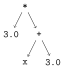

In [10]:
display(best_tree, grammar)

In [11]:
srand(0)
ind1 = GrammaticalEvolution.select(p.select_method, pop, losses)
node1 = GrammaticalEvolution.decode(ind1, grammar, :Real).node
display(node1, grammar)

:x

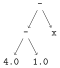

In [12]:
srand(4)
ind2 = GrammaticalEvolution.select(p.select_method, pop, losses)
node2 = GrammaticalEvolution.decode(ind2, grammar, :Real).node
display(node2, grammar)

In [13]:
ind1

5-element Array{Int64,1}:
  2685370321605084886
 -3702360005862138301
  8603170902964801110
  2744240855864043070
  2855546127016599912

In [14]:
ind2

5-element Array{Int64,1}:
 -5709378026784038018
 -4638217506560872160
  2412787040955850733
 -6755966082412089502
 -6661740532992639830

In [15]:
srand(4)
child = GrammaticalEvolution.crossover(ind1, ind2)

5-element Array{Int64,1}:
  2685370321605084886
 -3702360005862138301
  2412787040955850733
 -6755966082412089502
 -6661740532992639830

In [16]:
srand(0)
ind3 = GrammaticalEvolution.select(p.select_method, pop, losses)
node3 = GrammaticalEvolution.decode(ind3, grammar, :Real).node
display(node3, grammar)

:x

In [17]:
ind3

5-element Array{Int64,1}:
  2685370321605084886
 -3702360005862138301
  8603170902964801110
  2744240855864043070
  2855546127016599912

In [18]:
srand(5)
child = GrammaticalEvolution.mutation(GrammaticalEvolution.RandomMutation(0.5),ind3)

5-element Array{Int64,1}:
  2685370321605084886
 -3702360005862138301
 -5269856566257922209
  2744240855864043070
  2855546127016599912

In [19]:
srand(2)
child = GrammaticalEvolution.mutation(GrammaticalEvolution.GeneDuplication(), ind3)

8-element Array{Int64,1}:
  2685370321605084886
 -3702360005862138301
  8603170902964801110
  2744240855864043070
  2855546127016599912
  2685370321605084886
 -3702360005862138301
  8603170902964801110

In [20]:
GrammaticalEvolution.limit_length!(child, 5)

5-element Array{Int64,1}:
  2685370321605084886
 -3702360005862138301
  8603170902964801110
  2744240855864043070
  2855546127016599912

In [21]:
optimize(p, grammar, :Real)

ExprOptimization.ExprOptResults(3{9,2{9,9}}, 57195.99699999999, :(5.0 + 5.0 * 5.0), nothing)

In [22]:
p = GrammaticalEvolutionParams(grammar,:Real,1000,25,10,6,0.2, 0.4, 0.4; select_method=GrammaticalEvolution.TruncationSelection(300))
result = optimize(p, grammar, :Real)

ExprOptimization.ExprOptResults(3{2{1,3{2{1,7}6}}5}, 1.318691936641718e-27, :(x * (x * 3.0 + 2.0) + 1.0), nothing)